In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime
con = sqlite3.connect('database.sqlite')
scores = pd.read_sql('SELECT reviewid, score FROM reviews', con)
artists = pd.read_sql('SELECT * FROM artists', con)
years = pd.read_sql('SELECT * FROM years', con)
genre = pd.read_sql('SELECT * FROM genres', con)
album = pd.read_sql('SELECT reviewid, title, pub_date FROM reviews', con)
con.close()

review = pd.merge(artists, album)
review = pd.merge(review, scores)
review = pd.merge(review, genre)
ri =["reviewid", "pub_date", "artist", "title", "genre", "score"]
review = review.reindex(columns=ri)
review["year"] = pd.DatetimeIndex(review["pub_date"]).year
review["genre"].fillna("Other", inplace = True)
review["score"].fillna(6.5, inplace= True)
print(review)

       reviewid    pub_date               artist  \
0         22703  2017-01-08       massive attack   
1         22721  2017-01-07             krallice   
2         22659  2017-01-07         uranium club   
3         22661  2017-01-06              kleenex   
4         22661  2017-01-06              liliput   
5         22725  2017-01-06                 taso   
6         22722  2017-01-05      various artists   
7         22704  2017-01-05          little simz   
8         22694  2017-01-05           yotam avni   
9         22714  2017-01-04            brian eno   
10        22724  2017-01-04              the lox   
11        22715  2017-01-04        harry bertoia   
12        22745  2017-01-03       run the jewels   
13        22700  2017-01-03       steven warwick   
14        22720  2017-01-02           yasiin bey   
15        22699  2017-01-02            smoke dza   
16        22699  2017-01-02            pete rock   
17        22665  2017-01-02      various artists   
18        22

                 score
genre                 
Other         7.019643
electronic    6.923048
experimental  7.334545
folk/country  7.207639
global        7.414286
jazz          7.323171
metal         6.948394
pop/r&b       6.894969
rap           6.900547
rock          6.944318


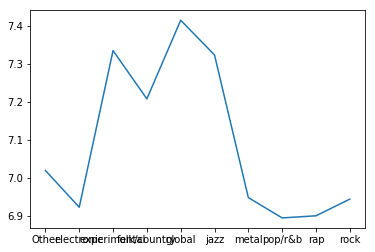

In [318]:
w = review[["genre","score"]].groupby("genre").mean()
print(w)
plt.plot(w)

In [319]:
Q = review[["genre","year","score"]].groupby(["genre","year"]).mean()
print(Q)

                    score
genre      year          
Other      1999  7.240000
           2000  6.575862
           2001  6.809615
           2002  6.749677
           2003  6.909756
           2004  7.314173
           2005  7.222901
           2006  7.036810
           2007  7.048993
           2008  6.974046
           2009  6.946602
           2010  7.093860
           2011  7.204040
           2012  6.939910
           2013  6.927937
           2014  7.076033
           2015  7.213953
           2016  7.150704
           2017  7.000000
electronic 1999  6.770000
           2000  7.125926
           2001  6.924000
           2002  6.941451
           2003  6.887544
           2004  7.107224
           2005  7.021344
           2006  6.902049
           2007  6.689593
           2008  6.749569
           2009  6.613308
...                   ...
rap        2007  6.649315
           2008  6.558511
           2009  6.552174
           2010  6.791837
           2011  6.829661
           2

         score
year          
1999  8.333333
2000  6.827273
2001  7.372727
2002  7.160714
2003  7.026829
2004  7.111111
2005  7.161290
2006  6.755556
2007  6.649315
2008  6.558511
2009  6.552174
2010  6.791837
2011  6.829661
2012  6.768421
2013  6.989720
2014  7.100926
2015  6.957471
2016  6.980000
2017  6.550000


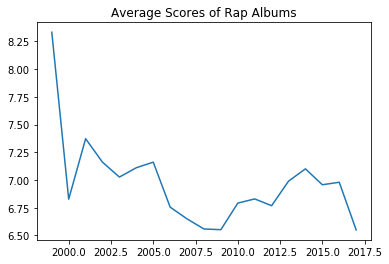

In [320]:
x = review.loc[review["genre"]=='rap']
X =x["year"].index.values
Y =x[["year","score"]].groupby(["year"]).mean()
print(Y)
plt.title("Average Scores of Rap Albums")
plt.plot(Y)


         score
year          
1999  6.730000
2000  7.159459
2001  7.676000
2002  7.551485
2003  7.492254
2004  7.545912
2005  7.237681
2006  7.328276
2007  7.310078
2008  7.266935
2009  6.986364
2010  7.192683
2011  7.290226
2012  7.428947
2013  7.125253
2014  7.361224
2015  7.497778
2016  7.390323
2017  7.700000


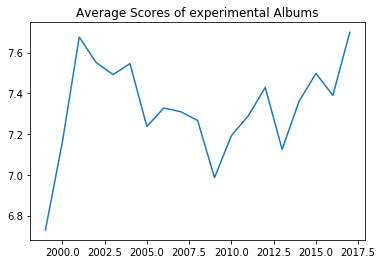

In [321]:
x = review.loc[review["genre"]=='experimental']
X =x["year"].index.values
Y =x[["year","score"]].groupby(["year"]).mean()
print(Y)
plt.title("Average Scores of experimental Albums")
plt.plot(Y)


In [322]:
x = review.loc[review["genre"]=='rap']
num = x.groupby("year").size()
#plt.title("Number of rap Albums reviewed")
#plt.plot(num)
newdf=pd.DataFrame(data=x)
X = newdf.groupby("year")
Y = newdf.groupby("year").size()


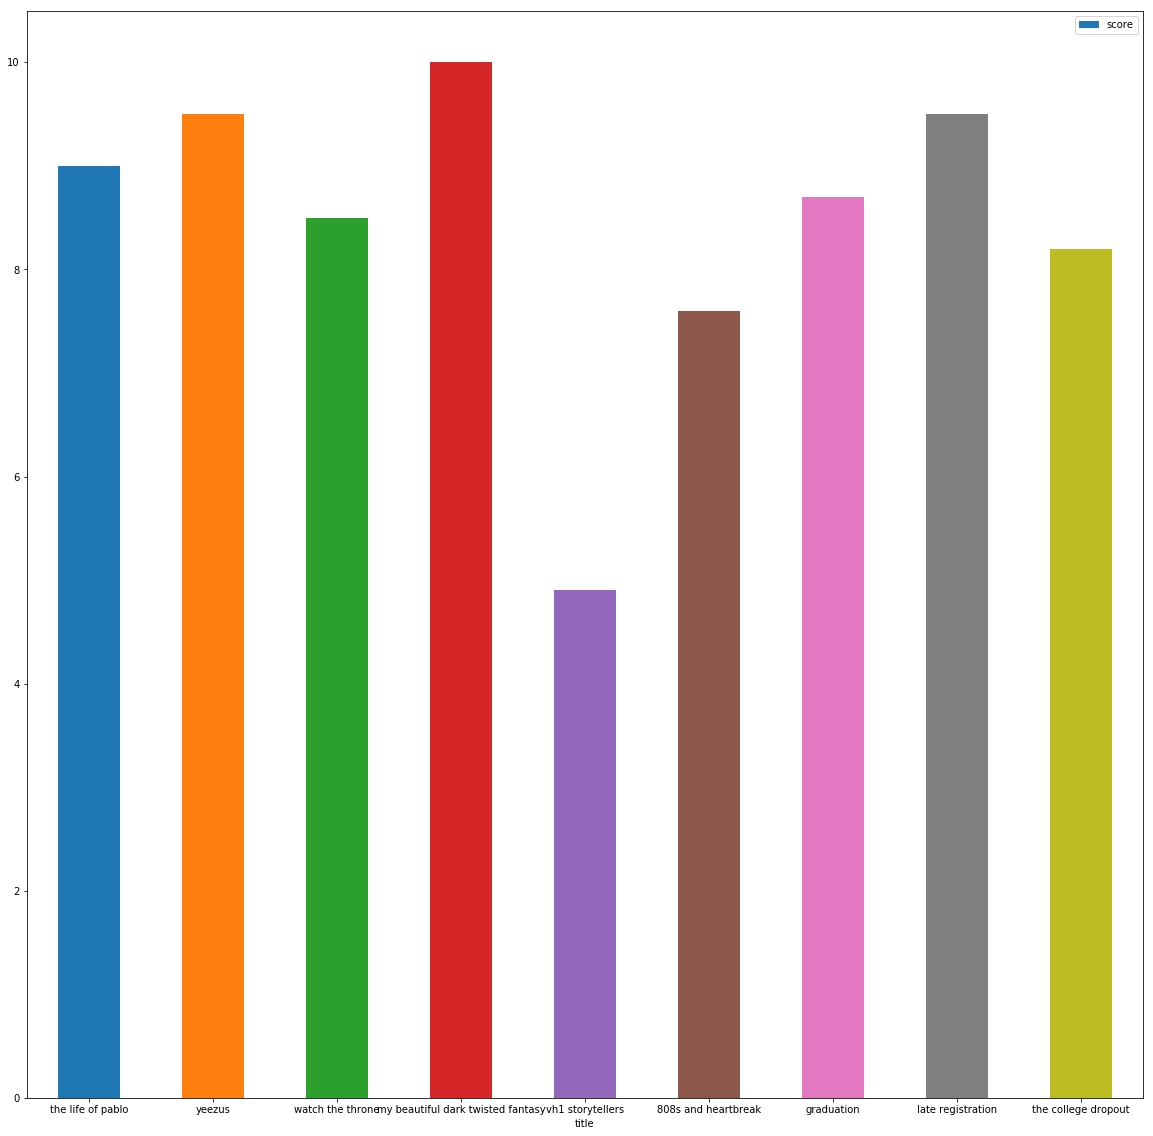

In [338]:
k = review.loc[review["artist"]=='kanye west']
k = pd.DataFrame(data=k)
ax = k.plot.bar(x='title', y='score', rot=0, figsize=(20,20))

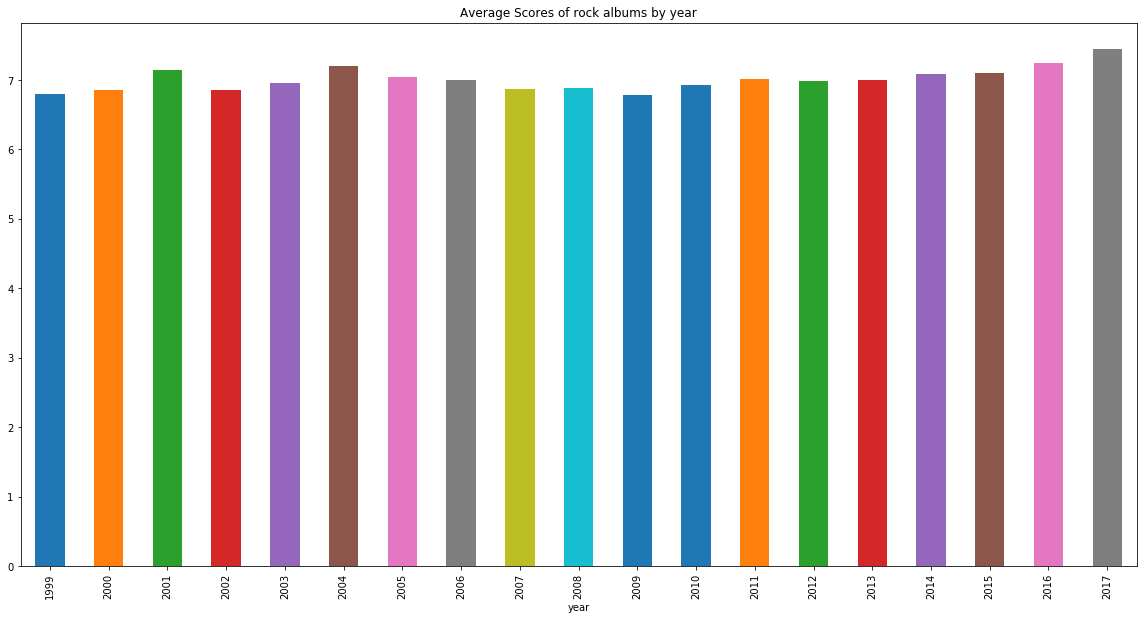

In [383]:
k = review.loc[review["genre"]=='rock']
k = review.loc[review["year"]!=2007]
k = pd.DataFrame(data=k)
x = k.groupby(["year"])["score"].mean()
ax = x.plot.bar(figsize=(20,10), title="Average Scores of rock albums by year")
plt.plot(x)

          Rock       Rap
year                    
1999  6.692254  8.333333
2000  6.765532  6.827273
2001  7.235563  7.372727
2002  6.732079  7.160714
2003  6.893994  7.026829
2004  7.184122  7.111111
2005  6.944302  7.161290
2006  6.952473  6.755556
2007  6.779028  6.649315
2008  6.862341  6.558511
2009  6.779462  6.552174
2010  6.866466  6.791837
2011  7.010296  6.829661
2012  6.986364  6.768421
2013  7.009879  6.989720
2014  7.063373  7.100926
2015  6.962132  6.957471
2016  7.290508  6.980000
2017  8.433333  6.550000


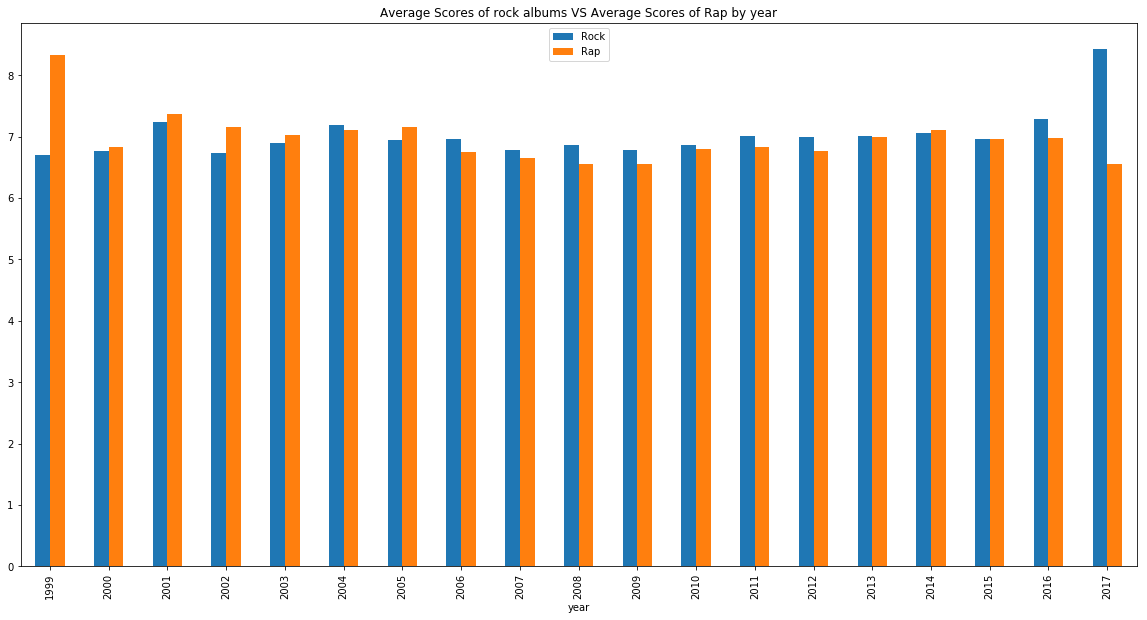

In [406]:
k = review.loc[review["genre"]=='rock']
k = pd.DataFrame(data=k)
x = k.groupby(["year"])["score"].mean().rename(columns={'score':'Rock'})
l = review.loc[review["genre"]=='rap']
y = l.groupby(["year"])["score"].mean().rename(columns={'score':'Rap'})
z = pd.concat([x,y], axis=1)
z = z.rename(columns={0: "Rock", 1: "Rap"})
#ax = x.plot.bar(figsize=(20,10), title="Average Scores of rock albums by year")
#plt.plot(x)
print(z)
ax = z.plot.bar(figsize=(20,10), title="Average Scores of rock albums VS Average Scores of Rap by year")